# STOCK PRICE PREDICTION OF ICICI COMPANY(1 yr ic_1yr)

In [46]:
#IMPORTING ALL REQUIRED PACKAGES
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.ticker as ticker

In [47]:
ic_1yr=pd.read_csv('ic_1.csv')
ic_1yr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-30,330.100006,333.899994,311.100006,313.399994,313.399994,36559880.0
1,2020-03-31,324.700012,334.850006,316.000000,323.750000,323.750000,46279768.0
2,2020-04-01,319.000000,323.750000,308.100006,311.149994,311.149994,33141186.0
3,2020-04-03,309.500000,309.500000,281.500000,286.649994,286.649994,57326314.0
4,2020-04-07,308.299988,329.600006,296.850006,326.100006,326.100006,57661076.0
...,...,...,...,...,...,...,...
244,2021-03-22,586.849976,586.849976,569.500000,573.450012,573.450012,21755401.0
245,2021-03-23,576.000000,589.250000,574.299988,586.400024,586.400024,29486417.0
246,2021-03-24,580.000000,580.549988,565.000000,567.500000,567.500000,24434219.0
247,2021-03-25,568.099976,579.000000,557.099976,571.549988,571.549988,27170186.0


# EXPLORATORY ic_1yr ANALYSIS(EDA)

In [48]:
#CHECKING SHAPE OF ic_1yrSET
ic_1yr.shape

(249, 7)

In [49]:
#CHECKING NULL VALUES IN ic_1yrSET
ic_1yr.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [50]:
#SINCE THE ic_1yrSET HAD NULL VALUES, WE REMOVE IT USING DROPNA() 
ic_1yr1=ic_1yr.dropna()
ic_1yr1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-30,330.100006,333.899994,311.100006,313.399994,313.399994,36559880.0
1,2020-03-31,324.700012,334.850006,316.000000,323.750000,323.750000,46279768.0
2,2020-04-01,319.000000,323.750000,308.100006,311.149994,311.149994,33141186.0
3,2020-04-03,309.500000,309.500000,281.500000,286.649994,286.649994,57326314.0
4,2020-04-07,308.299988,329.600006,296.850006,326.100006,326.100006,57661076.0
...,...,...,...,...,...,...,...
244,2021-03-22,586.849976,586.849976,569.500000,573.450012,573.450012,21755401.0
245,2021-03-23,576.000000,589.250000,574.299988,586.400024,586.400024,29486417.0
246,2021-03-24,580.000000,580.549988,565.000000,567.500000,567.500000,24434219.0
247,2021-03-25,568.099976,579.000000,557.099976,571.549988,571.549988,27170186.0


In [51]:
ic_1yr1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [52]:
#DESCIPTION OF ic_1yrSET
ic_1yr1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,435.995564,442.899396,427.916531,435.554838,435.554838,3.545871e+07
std,102.956853,103.286224,102.535057,103.385821,103.385821,1.640764e+07
min,296.049988,297.899994,281.500000,286.649994,286.649994,1.333090e+07
25%,353.675003,359.912498,346.824997,352.762512,352.762512,2.379611e+07
50%,387.074997,392.099991,381.074997,386.925003,386.925003,3.090285e+07
75%,520.674988,528.312485,514.662476,523.212479,523.212479,4.320039e+07
max,673.400024,679.400024,652.000000,673.950012,673.950012,1.259394e+08


In [53]:
#INFORMATION ABOUT ic_1yrSET
ic_1yr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.5+ KB


In [54]:
ic_1yr2 = ic_1yr1.groupby('Date')[['Close']].mean()


In [55]:
ic_1yr2

,Close
Date,
2020-03-30,313.399994
2020-03-31,323.750000
2020-04-01,311.149994
2020-04-03,286.649994
2020-04-07,326.100006
...,...
2021-03-22,573.450012
2021-03-23,586.400024
2021-03-24,567.500000


In [56]:
type(ic_1yr1.Date[0])

str

# VISUALIZATION OF ic_1yrSET

Text(0, 0.5, 'Price')

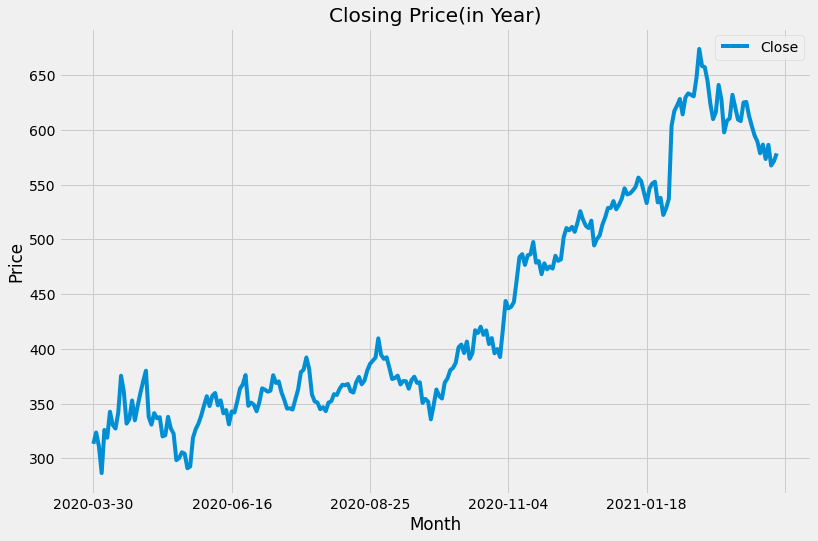

In [57]:
#plotting the graph with date againts closing price(in month)
ic_1yr1.plot(figsize=(12,8),x='Date',y='Close',title='Closing Price(in Year)',fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price")

In [58]:
ic_1yr2

,Close
Date,
2020-03-30,313.399994
2020-03-31,323.750000
2020-04-01,311.149994
2020-04-03,286.649994
2020-04-07,326.100006
...,...
2021-03-22,573.450012
2021-03-23,586.400024
2021-03-24,567.500000


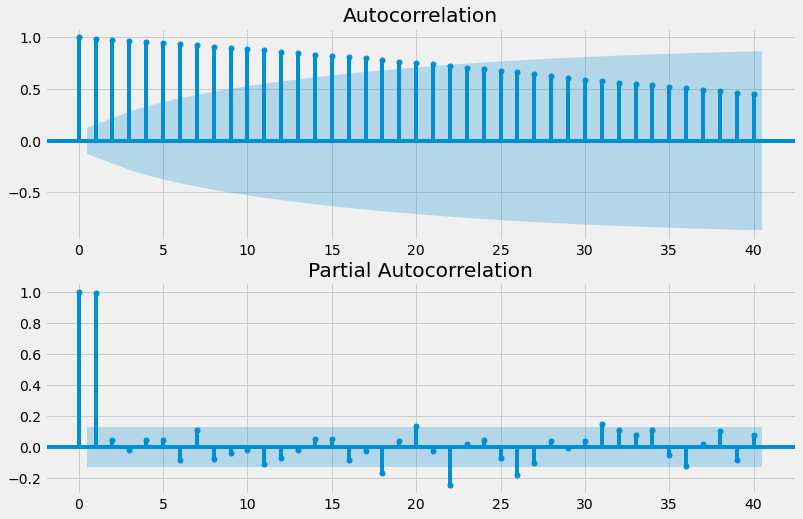

In [59]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ic_1yr2['Close'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ic_1yr2['Close'].iloc[13:],lags=40,ax=ax2)

# DICKEY FULLER TEST(For checking stationarity)

In [60]:
test_result=adfuller(ic_1yr2['Close'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. ic_1yr has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [61]:
ic_1yr2['Close First Difference'] = ic_1yr2['Close'] - ic_1yr2['Close'].shift(1)
ic_1yr2['Close'].shift(1)


Date
2020-03-30           NaN
2020-03-31    313.399994
2020-04-01    323.750000
2020-04-03    311.149994
2020-04-07    286.649994
                 ...    
2021-03-22    586.650024
2021-03-23    573.450012
2021-03-24    586.400024
2021-03-25    567.500000
2021-03-26    571.549988
Name: Close, Length: 248, dtype: float64

ADF Test Statistic : -15.944572324277145
p-value : 7.474658362473953e-29
#Lags Used : 0
Number of Observations Used : 246
strong evidence against the null hypothesis(Ho), reject the null hypothesis. ic_1yr has no unit root and is stationary


Text(0, 0.5, 'Price')

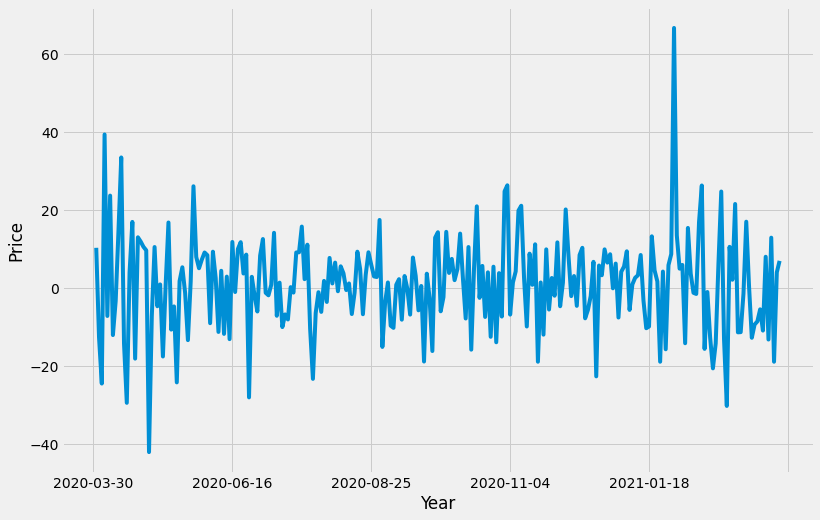

In [62]:
adfuller_test(ic_1yr2['Close First Difference'].dropna())
ic_1yr2['Close First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")

In [63]:
stepwise_fit = auto_arima(ic_1yr2['Close'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1943.416, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1945.319, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1945.302, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1943.300, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1944.126, Time=0.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.095 seconds


In [64]:
train_ic_1yr, test_ic_1yr = ic_1yr2[0:int(len(ic_1yr2)*0.7)], ic_1yr2[int(len(ic_1yr2)*0.7):]
training_ic_1yr = train_ic_1yr['Close'].values
test_ic_1yr = test_ic_1yr['Close'].values
history = [x for x in training_ic_1yr]
model_predictions = []
N_test_observations = len(test_ic_1yr)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_ic_1yr[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_ic_1yr, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))


Testing Mean Squared Error is 186.46746833904413


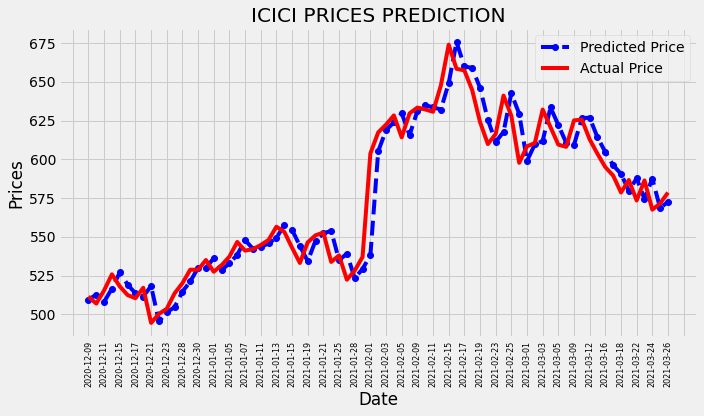

In [65]:
test_set_range = ic_1yr2[int(len(ic_1yr2)*0.7):].index
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_ic_1yr, color='red', label='Actual Price')
plt.title('ICICI PRICES PREDICTION')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.tick_params(axis='x' ,labelsize=8)
# plt.xticks(np.arange(881,1259,50), ic_1yr2.Date[881:1259:50])
plt.legend()
plt.tight_layout()
plt.show()

In [66]:
pred=model_fit.predict(start=len(ic_1yr2),end=len(ic_1yr2)+30,typ='levels')
print(pred)

[572.59937822 573.64876844 574.69815866 575.74754888 576.7969391
 577.84632932 578.89571954 579.94510976 580.99449998 582.0438902
 583.09328041 584.14267063 585.19206085 586.24145107 587.29084129
 588.34023151 589.38962173 590.43901195 591.48840217 592.53779239
 593.58718261 594.63657283 595.68596305 596.73535327 597.78474349
 598.83413371 599.88352393 600.93291415 601.98230437 603.03169459
 604.0810848  605.13047502]


In [67]:
# model performance
mse = mean_squared_error(test_ic_1yr, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_ic_1yr,model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_ic_1yr, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(model_predictions - test_ic_1yr)/np.abs(test_ic_1yr))
print('MAPE: '+str(mape))

MSE: 186.46746833904413
MAE: 9.958102094516526
RMSE: 13.655309163070756
MAPE: 0.09626581899221845
